# ✨ 🐍🐼 Python-Pandas: Make Your Operations Fly with Numba and Pandas ✨

### ❓ Are your Pandas analyses slowing down with large datasets?
🙃 Boost your calculations with Numba!

### 🔧 How does it work?
Numba is a library that accelerates numerical operations in Python by compiling custom functions. With the `@njit` decorator, you can optimize computationally intensive calculations within a Pandas DataFrame.

### 🔎 Why does it matter?
In massive datasets, custom operations often become bottlenecks. Optimizing with Numba can provide up to 7x speed improvements, saving time and boosting efficiency.

### ✨ Real-world example:
Imagine calculating the Euclidean distance between points in a location dataset. Here's the performance comparison:
🚀 Numba optimized: 0.1864 seconds.
🐢 Pandas apply: 1.4567 seconds.

### ⚙️ Business impact:
- 📈 Speeds up processes in geolocation analysis.
- 🛠️ Enhances customer experience in proximity-based recommendation systems.

### 📊 Code summary:
1️⃣ Create a dataset with fictional locations (coordinates).
2️⃣ Use a Numba-optimized function to calculate the Euclidean distance.
3️⃣ Compare performance with traditional Pandas methods.

### 💭 What other intensive calculations could you speed up with this technique?

🌍✨ **#DataScience #MachineLearning #PythonPandas #Optimization #NumbaRocks**

🔗 [Code on GitHub](https://github.com/jcombari/PyForAll/blob/main/20250125_numba.ipynb)

---

# ✨ 🐍🐼 Python-Pandas: Haz que tus operaciones vuelen con Numba y Pandas ✨

### ❓ ¿Tus análisis en Pandas se sienten lentos al procesar grandes volúmenes de datos?
🙃 ¡Dale un turbo a tus cálculos con Numba!

### 🔧 ¿Cómo funciona?
Numba es una librería que acelera operaciones numéricas en Python compilando funciones personalizadas. Usando el decorador `@njit`, podemos optimizar cálculos matemáticos intensivos dentro de un DataFrame de Pandas.

### 🔎 ¿Por qué importa?
En datasets masivos, las operaciones personalizadas suelen ser un cuello de botella. Optimizar con Numba puede ofrecer hasta 7 veces más velocidad, ahorrando tiempo y mejorando la eficiencia operativa.

### ✨ Ejemplo real:
Imagina que necesitas calcular la distancia euclidiana entre puntos en un dataset de ubicaciones. Aquí una comparación de tiempos:
🚀 Numba optimizado: 0.1864 segundos.
🐢 Pandas apply: 1.4567 segundos.

### ⚙️ Impacto en el negocio:
- 📈 Agiliza procesos en análisis de geolocalización.
- 🛠️ Mejora la experiencia del cliente en sistemas de recomendación basados en proximidad.

### 📊 Resumen del código:
1️⃣ Creamos un dataset con ubicaciones ficticias (coordenadas).
2️⃣ Usamos una función optimizada con Numba para calcular la distancia euclidiana.
3️⃣ Comparamos el rendimiento con métodos tradicionales de Pandas.

### 💭 ¿Qué otros cálculos intensivos podrías acelerar con esta técnica?

🌍✨ **#CienciaDeDatos #MachineLearning #PythonPandas #Optimización #NumbaRocks**

🔗 [Código en GitHub](https://github.com/jcombari/PyForAll/blob/main/20250125_numba.ipynb)


Numba optimized: 0.1864 seconds
Pandas apply: 1.4567 seconds


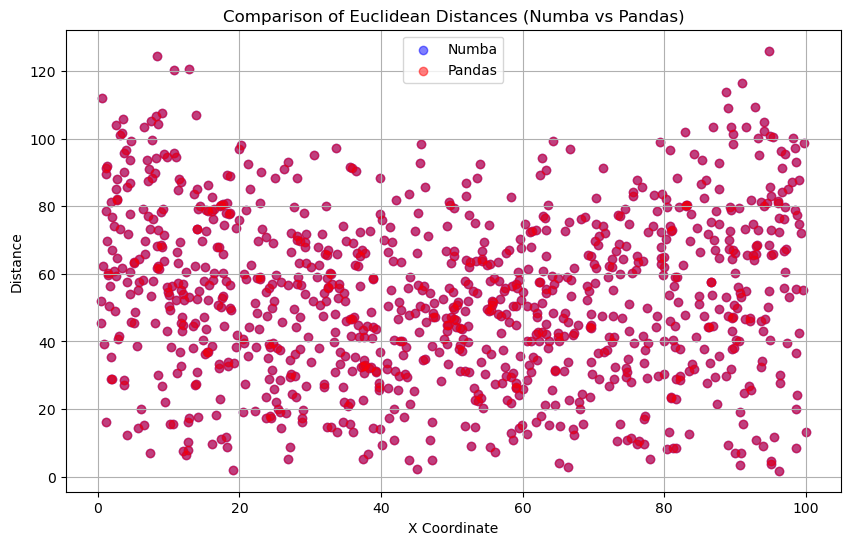

In [7]:
import numpy as np
import pandas as pd
from numba import njit  # Import Numba for just-in-time compilation
import time  # For performance comparison

# Generate a sample dataset with random coordinates
np.random.seed(42)
data = {
    "x1": np.random.uniform(0, 100, 100000),
    "y1": np.random.uniform(0, 100, 100000),
    "x2": np.random.uniform(0, 100, 100000),
    "y2": np.random.uniform(0, 100, 100000),
}
df = pd.DataFrame(data)

# Define a Numba-optimized function to calculate Euclidean distance
@njit  # Decorator to compile the function with Numba
def calculate_distance(x1, y1, x2, y2):
    return np.sqrt((x2 - x1) ** 2 + (y2 - y1) ** 2)

# Apply the optimized function to the DataFrame
start_numba = time.time()
df["distance_numba"] = calculate_distance(
    df["x1"].values, df["y1"].values, df["x2"].values, df["y2"].values
)
end_numba = time.time()

# Compare with a traditional Pandas apply (slower)
start_pandas = time.time()
df["distance_pandas"] = df.apply(
    lambda row: np.sqrt((row["x2"] - row["x1"]) ** 2 + (row["y2"] - row["y1"]) ** 2),
    axis=1,
)
end_pandas = time.time()

# Print results
print(f"Numba optimized: {end_numba - start_numba:.4f} seconds")
print(f"Pandas apply: {end_pandas - start_pandas:.4f} seconds")

# Plot a sample of distances for visualization
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df["x1"][:1000], df["distance_numba"][:1000], color="blue", alpha=0.5, label="Numba")
plt.scatter(df["x1"][:1000], df["distance_pandas"][:1000], color="red", alpha=0.5, label="Pandas")
plt.title("Comparison of Euclidean Distances (Numba vs Pandas)")
plt.xlabel("X Coordinate")
plt.ylabel("Distance")
plt.legend()
plt.grid()
plt.show()
